### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'PMG 271 monitoring'

In [4]:
mixture_path = '../../data/PMG_271/PMG271_monitoring_druga_seria.csv'

reagents_path = '../../data/PMG_271/PMG271_widmo0_druga_seria.csv'

mixture_separator = '\t'

reagents_separator = '\t'

data_path = '../../data/PMG_271/'

#### Mixture in time

In [5]:
mixture_time_data = pd.read_csv(mixture_path, sep = mixture_separator).iloc[:,:-1]

In [6]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, mixture_time_data.shape[1])]

In [7]:
mixture_time_data.columns = names

In [8]:
def load_spectrum(mixture_time_data, moment_of_time):
    ppm = mixture_time_data['ppm']
    intensity = mixture_time_data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


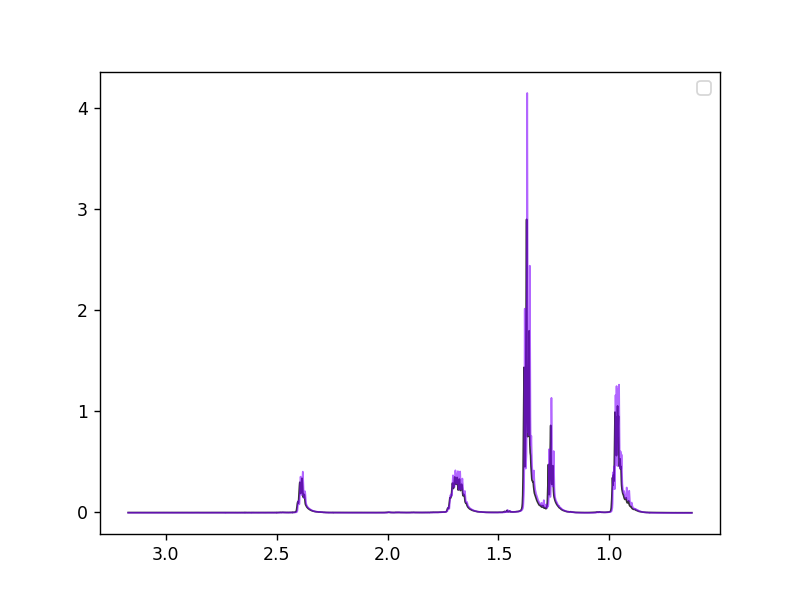

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [10]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                     load_spectrum(mixture_time_data, 1000)], profile=True)

#### Reagents

In [11]:
reagent = pd.read_csv(reagents_path, sep=reagents_separator, header=None).iloc[:,:2]

In [12]:
reagent

,0,1
0,0.537387,-0.017761
1,0.537509,-0.017638
2,0.537631,-0.017345
3,0.537752,-0.017331
4,0.537874,-0.017656
...,...,...
19738,2.938310,-0.015715
19739,2.938430,-0.015747
19740,2.938550,-0.015779
19741,2.938680,-0.015874


<IPython.core.display.Javascript object>


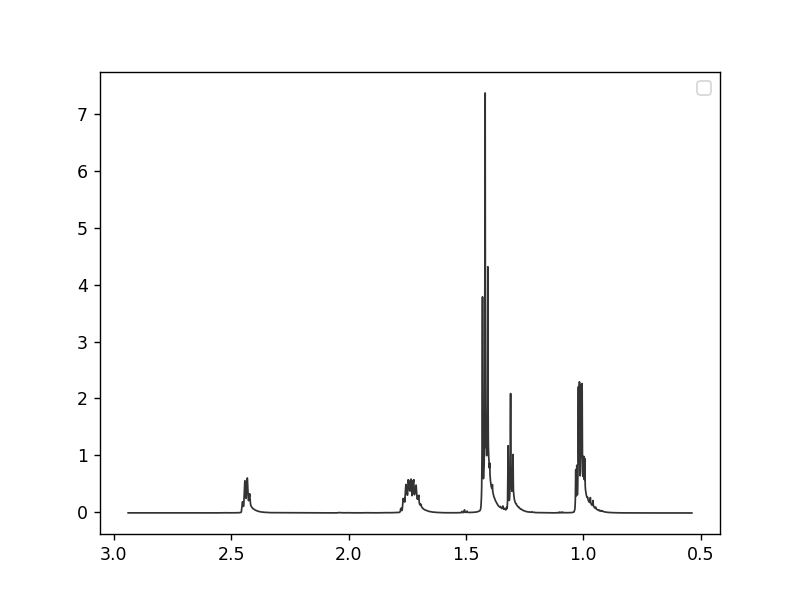

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [13]:
ppm = reagent.iloc[:,0]
ints = reagent.iloc[:,1]
reagent_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([reagent_sp], profile=True)

In [14]:
substrat0 = reagent[reagent[0].apply(lambda x: (x> 0.9 and x<1.1) or (x>1.33 and x<1.55))]
substrat1 = reagent[reagent[0].apply(lambda x: (x>1.2 and x<1.33) or (x>1.6 and x<1.8) or (x>2.35 and x<2.5))]

<IPython.core.display.Javascript object>


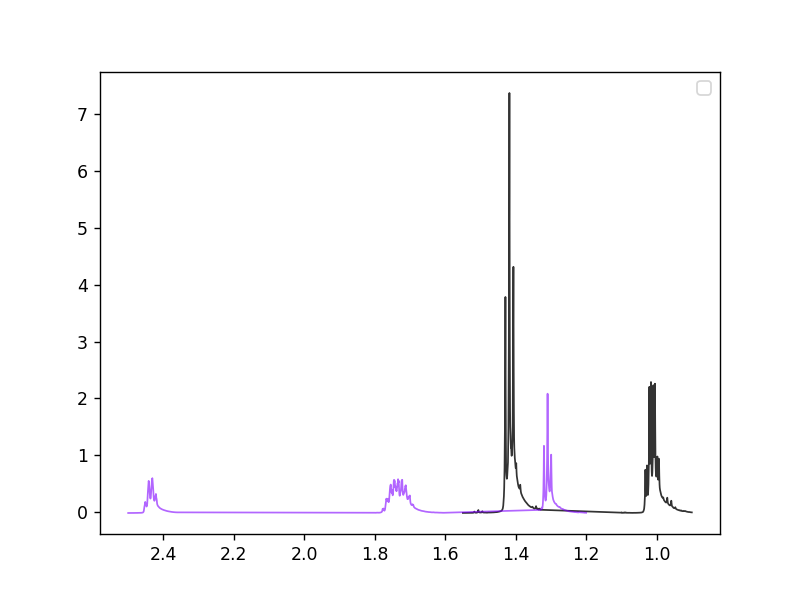

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [18]:
ppm = substrat0.iloc[:,0]
ints = substrat0.iloc[:,1]
sp0_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
ppm = substrat1.iloc[:,0]
ints = substrat1.iloc[:,1]
sp1_sp = NMRSpectrum(confs = list(zip(ppm, ints)))
#mix1 = load_spectrum(mixture_time_data, 1)
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([sp0_sp, sp1_sp], profile=True)

### Saving preprocessed spectra

In [17]:
np.savetxt(data_path + 'preprocessed_substrate0.csv', substrat0, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_substrate1.csv', substrat1, delimiter = '\t')